In [42]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [43]:
# Activate gpu


# Task 1

Extract a subset of traning samples from the MNIST handwriten signatures. Create a small convolution neural network with two convolution layers, two pool layers, flatten, dense layer and softmax layer to classify the images. Find out classification error for learning set and testing set.



In [44]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Extract a subset of training samples (for example, first 1000 samples)
train_images = train_images[:1000]
train_labels = train_labels[:1000]

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



with tf.device('/device:GPU:0'):
  # Train the model
  model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

  # Evaluate the model on the training set
  train_loss, train_acc = model.evaluate(train_images, train_labels)

  # Evaluate the model on the test set
  test_loss, test_acc = model.evaluate(test_images, test_labels)

  print(f'Training accuracy: {train_acc*100:.2f}%')
  print(f'Testing accuracy: {test_acc*100:.2f}%')


Epoch 1/20
13/13 [==============================] - 2s 27ms/step - loss: 2.1244 - accuracy: 0.3475 - val_loss: 1.7475 - val_accuracy: 0.6250
Epoch 2/20
13/13 [==============================] - 0s 9ms/step - loss: 1.2562 - accuracy: 0.6950 - val_loss: 0.8485 - val_accuracy: 0.7500
Epoch 3/20
13/13 [==============================] - 0s 10ms/step - loss: 0.6294 - accuracy: 0.8050 - val_loss: 0.5554 - val_accuracy: 0.8300
Epoch 4/20
13/13 [==============================] - 0s 10ms/step - loss: 0.4466 - accuracy: 0.8650 - val_loss: 0.5106 - val_accuracy: 0.8700
Epoch 5/20
13/13 [==============================] - 0s 10ms/step - loss: 0.3407 - accuracy: 0.8913 - val_loss: 0.5056 - val_accuracy: 0.8600
Epoch 6/20
13/13 [==============================] - 0s 12ms/step - loss: 0.2794 - accuracy: 0.9212 - val_loss: 0.4630 - val_accuracy: 0.8750
Epoch 7/20
13/13 [==============================] - 0s 10ms/step - loss: 0.2136 - accuracy: 0.9488 - val_loss: 0.4497 - val_accuracy: 0.8950
Epoch 8/20
13/

In [45]:
with tf.device('/device:GPU:0'):
  # Calculate classification error for learning set
  train_error = 1 - train_acc

  # Calculate classification error for testing set
  test_error = 1 - test_acc

  print(f'Classification error for learning set: {train_error*100:.2f}%')
  print(f'Classification error for testing set: {test_error*100:.2f}%')


Classification error for learning set: 1.70%
Classification error for testing set: 6.72%


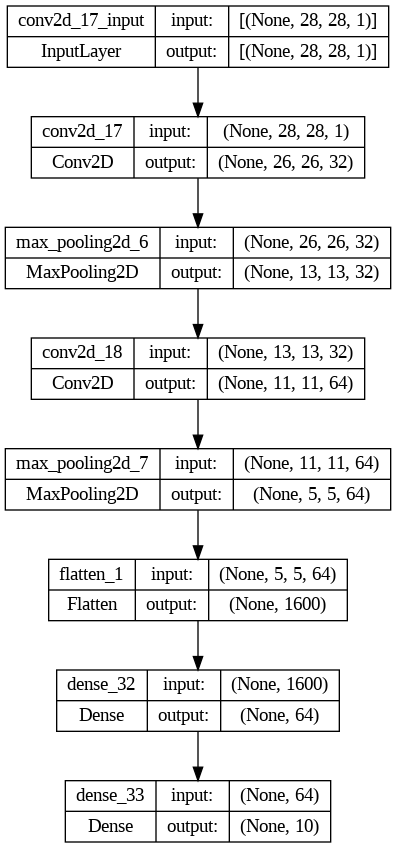

In [46]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is the name of your Sequential model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


# Task 2

Create an autoencoder for MNIST fashion dataset. The input and the output is the same image of a number 28x28 pixels.


- Depicting Generated image of the autoencoder with original image.

Epoch 1/50
235/235 [==============================] - 3s 6ms/step - loss: 0.3796 - val_loss: 0.3185
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3105 - val_loss: 0.3082
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.3031 - val_loss: 0.3022
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2982 - val_loss: 0.2983
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2951 - val_loss: 0.2958
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2929 - val_loss: 0.2936
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2908 - val_loss: 0.2919
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2892 - val_loss: 0.2904
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2879 - val_loss: 0.2895
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2865 - val_loss: 0.2884

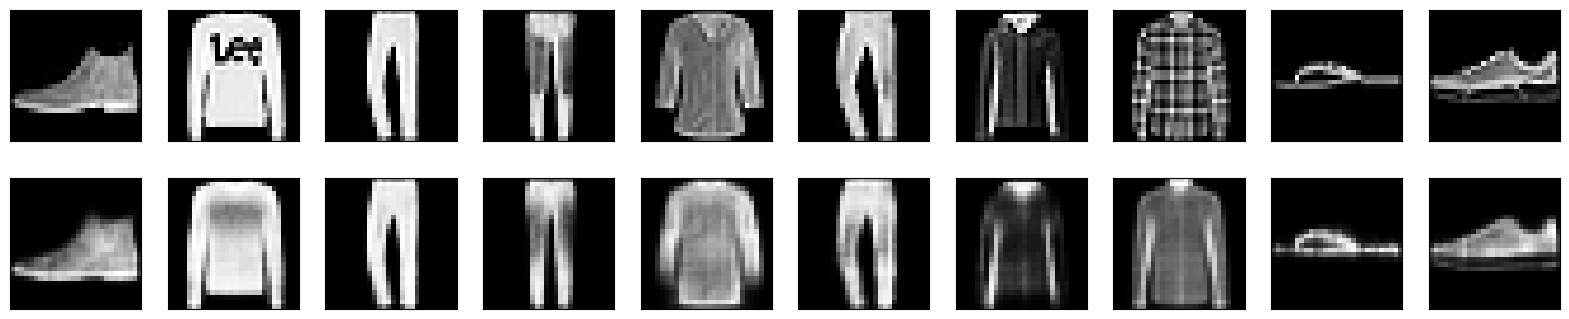

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


##### Ploting 20 samples with the labels.

In [48]:
# # import random as rnd

# # t_x = []
# # t_y = []
# # sz = len(train_images)
# # with tf.device('/device:GPU:0'):
# #   for i in range(20):
# #     idx = rnd.randint(0,sz-1)
# #     for c in range(10):
# #       while c not in train_labels[idx]:
# #         idx = rnd.randint(0,sz-1)
# #       t_x += [np.ndarray.flatten(train_images[idx])]
# #       t_y += [train_labels[idx]]

# #   t_x = np.array(t_x, dtype=np.float32)/255.0

# import random as rnd
# import numpy as np
# import tensorflow as tf

# # Get all indices of the training data
# sz = len(train_images)
# indices = np.arange(sz)

# # Preallocate lists to hold the selected data
# t_x = []
# t_y = []

# # Use GPU device
# with tf.device('/device:GPU:0'):
#     for _ in range(20):
#         selected_indices = []
#         for c in range(10):
#             # Create a mask for indices where the class label is present
#             class_indices = indices[np.array([c in label for label in train_labels])]

#             # Ensure that class_indices is not empty
#             if class_indices.size == 0:
#                 continue  # Skip if no images are found for this class

#             selected_index = rnd.choice(class_indices)
#             selected_indices.append(selected_index)

#         # Extend the selected indices only if we have selected some
#         if selected_indices:
#             t_x.extend(train_images[selected_indices].reshape(len(selected_indices), -1))
#             t_y.extend(train_labels[selected_indices])

# # Convert lists to numpy arrays and normalize
# if t_x and t_y:
#     t_x = np.array(t_x, dtype=np.float32) / 255.0
#     t_y = np.array(t_y)
# else:
#     t_x = np.array([], dtype=np.float32)
#     t_y = np.array([])






Encoder Decoder Architecture for the MNIST Dataset.

- Plot original and reconstructed images

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import random as rnd

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a random subset of the dataset
t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
    idx = rnd.randint(0, sz - 1)
    for c in range(10):
        while train_labels[idx] != c:
            idx = rnd.randint(0, sz - 1)
        t_x.append(np.ndarray.flatten(train_images[idx]))
        t_y.append(train_labels[idx])

t_x = np.array(t_x, dtype=np.float32) / 255.0

# Flatten the images
t_x = t_x.reshape((len(t_x), np.prod(t_x.shape[1:])))

# autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# autoencoder model
autoencoder = Model(input_img, decoded)

# Compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(t_x, t_x, epochs=50, batch_size=4, shuffle=True)

# Encode and decode the subset images
decoded_imgs = autoencoder.predict(t_x)


Epoch 1/50
50/50 [==============================] - 2s 3ms/step - loss: 0.5488
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4377
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4023
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3867
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3746
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3653
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3654
Epoch 8/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3547
Epoch 9/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3460
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3399
Epoch 11/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3346
Epoch 12/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3293
Epoch 13/50
50/50 [==============================

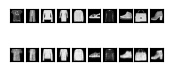

In [50]:

# Plot original and reconstructed images
n = len(t_x)
plt.figure(figsize=(40, 10))
for i in range(10):
    # Display original images
    ax = plt.subplot(20, n, i + 1)
    plt.imshow(t_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(20, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/50
50/50 [==============================] - 2s 3ms/step - loss: 0.5379
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4282
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4062
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3908
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3758
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3688
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3601
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3509
Epoch 9/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3466
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3434
Epoch 11/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3422
Epoch 12/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3348
Epoch 13/50
50/50 [==============================

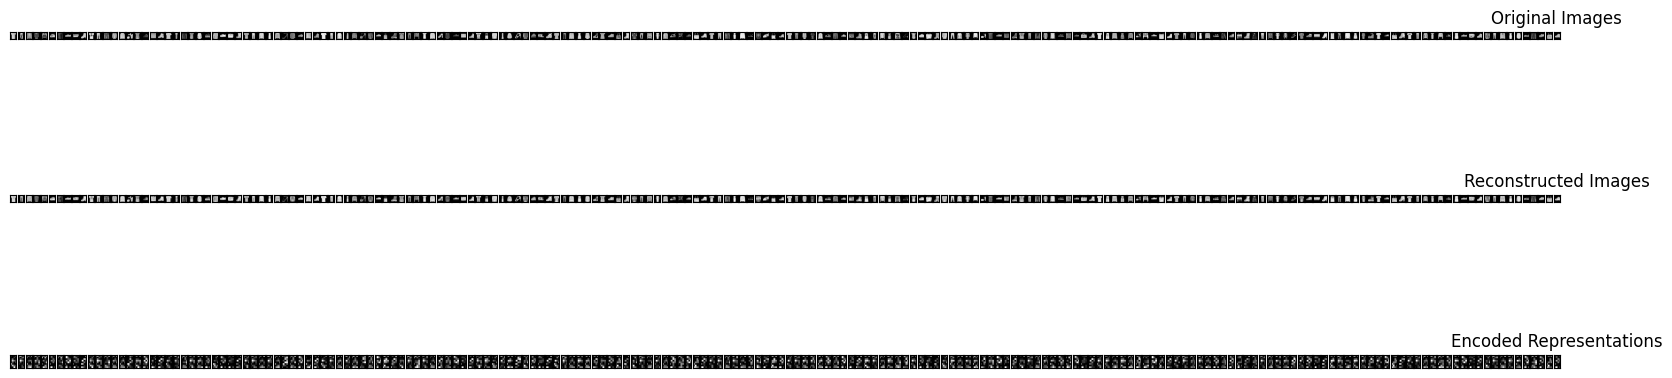

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import random as rnd

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a random subset of the dataset
t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
    idx = rnd.randint(0, sz - 1)
    for c in range(10):
        while train_labels[idx] != c:
            idx = rnd.randint(0, sz - 1)
        t_x.append(np.ndarray.flatten(train_images[idx]))
        t_y.append(train_labels[idx])

t_x = np.array(t_x, dtype=np.float32) / 255.0


t_x = t_x.reshape((len(t_x), np.prod(t_x.shape[1:])))

# autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# autoencoder model
autoencoder = Model(input_img, decoded)

# Compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(t_x, t_x, epochs=50, batch_size=4, shuffle=True)

# Encode and decode the subset images
decoded_imgs = autoencoder.predict(t_x)

# Separate visualizations for original, reconstructed, and encoded images
n = len(t_x)
plt.figure(figsize=(20, 6))

# Plot original images
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(t_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.title('Original Images')

# Plot reconstructed images
for i in range(n):
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.title('Reconstructed Images')

# Plot encoded representations
encoder_model = Model(inputs=input_img, outputs=encoded)
encoded_imgs = encoder_model.predict(t_x)

for i in range(n):
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))  # 32-dimensional encoded representation
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.title('Encoded Representations')
plt.show()



## Subtask 1

 Use two dense layers (hidden and output). Hidden layer with 2 neurons, output layer with 784 neurons. Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.


Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.6549
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5507
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5162
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5070
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5010
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4947
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4865
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4755
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4630
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4507
Epoch 11/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4405
Epoch 12/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4334
Epoch 13/50
50/50 [==============================

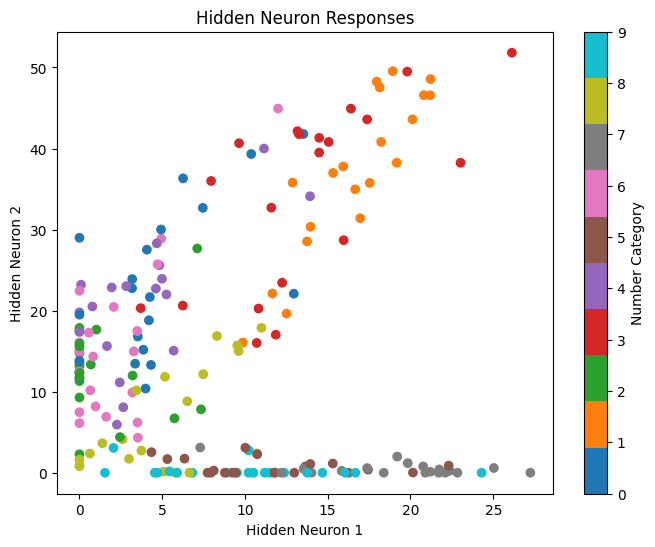

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import random as rnd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a random subset of the dataset
t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
    idx = rnd.randint(0, sz - 1)
    for c in range(10):
        while train_labels[idx] != c:
            idx = rnd.randint(0, sz - 1)
        t_x.append(np.ndarray.flatten(train_images[idx]))
        t_y.append(train_labels[idx])

t_x = np.array(t_x, dtype=np.float32) / 255.0

# Flatten the images
t_x = t_x.reshape((len(t_x), np.prod(t_x.shape[1:])))

# Define the autoencoder architecture with 2 neurons in the hidden layer
input_img = Input(shape=(784,))
encoded = Dense(2, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(t_x, t_x, epochs=50, batch_size=4, shuffle=True)

# Extract the responses of the hidden layer
encoder_model = Model(inputs=input_img, outputs=encoded)
encoded_imgs = encoder_model.predict(t_x)

# Plot the response of hidden neurons in a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=t_y, cmap='tab10')
plt.colorbar(scatter, label='Number Category')
plt.title('Hidden Neuron Responses')
plt.xlabel('Hidden Neuron 1')
plt.ylabel('Hidden Neuron 2')
plt.show()



## Subtask 2

Modify Subtask 1 so that you add three hidden layers and 2 latent features, i.e.
784-10-2-10-784 neurons. Observe differences.



Epoch 1/50
50/50 [==============================] - 1s 3ms/step - loss: 0.6497
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5423
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5208
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5112
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5051
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5005
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4970
Epoch 8/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4941
Epoch 9/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4918
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4900
Epoch 11/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4884
Epoch 12/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4864
Epoch 13/50
50/50 [==============================

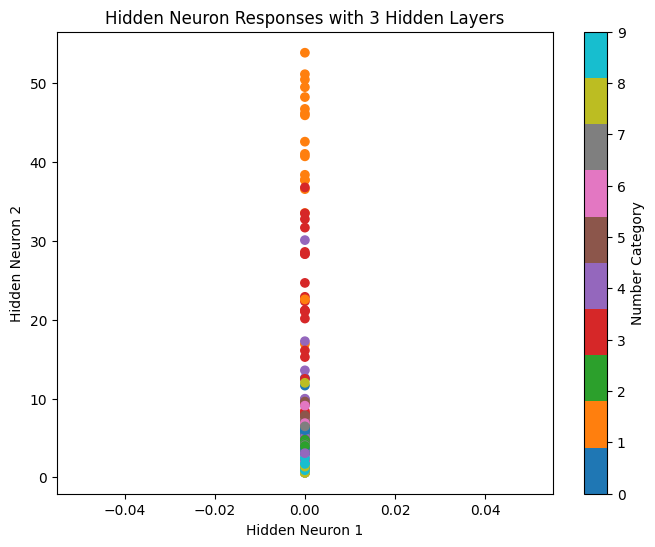

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import random as rnd
from sklearn.preprocessing import StandardScaler

# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a random subset of the dataset
t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
    idx = rnd.randint(0, sz - 1)
    for c in range(10):
        while train_labels[idx] != c:
            idx = rnd.randint(0, sz - 1)
        t_x.append(np.ndarray.flatten(train_images[idx]))
        t_y.append(train_labels[idx])

t_x = np.array(t_x, dtype=np.float32) / 255.0

# Flatten the images
t_x = t_x.reshape((len(t_x), np.prod(t_x.shape[1:])))

# Define the autoencoder architecture with three hidden layers and 2 latent features
input_img = Input(shape=(784,))
hidden1 = Dense(10, activation='relu')(input_img)
hidden2 = Dense(2, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
decoded = Dense(784, activation='sigmoid')(hidden3)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(t_x, t_x, epochs=50, batch_size=4, shuffle=True)

# Extract the responses of the hidden layer
encoder_model = Model(inputs=input_img, outputs=hidden2)
encoded_imgs = encoder_model.predict(t_x)

# Plot the response of hidden neurons in a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=t_y, cmap='tab10')
plt.colorbar(scatter, label='Number Category')
plt.title('Hidden Neuron Responses with 3 Hidden Layers')
plt.xlabel('Hidden Neuron 1')
plt.ylabel('Hidden Neuron 2')
plt.show()


## Subtask 3

Modify Subtask 1 so that you add convolution layers, pooling layers, ... for the autoencoder and observe differences.


Epoch 1/50
50/50 [==============================] - 2s 4ms/step - loss: 0.6130
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4157
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3598
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3398
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3291
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3216
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3165
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3128
Epoch 9/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3095
Epoch 10/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3064
Epoch 11/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3040
Epoch 12/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3026
Epoch 13/50
50/50 [==============================

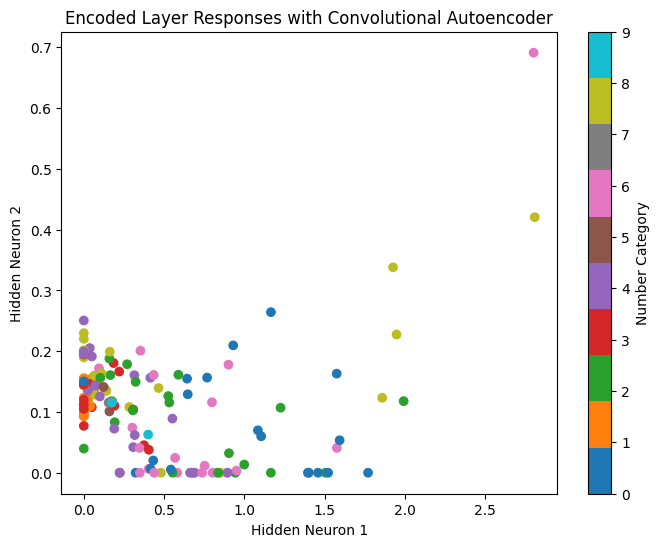

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Reshape, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import random as rnd
from sklearn.preprocessing import StandardScaler

# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a random subset of the dataset
t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
    idx = rnd.randint(0, sz - 1)
    for c in range(10):
        while train_labels[idx] != c:
            idx = rnd.randint(0, sz - 1)
        t_x.append(train_images[idx])
        t_y.append(train_labels[idx])

t_x = np.array(t_x, dtype=np.float32) / 255.0

# Add channel dimension to the images for convolutional layers
t_x = np.expand_dims(t_x, axis=-1)

# Define the convolutional autoencoder architecture
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(2, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Reshape to (28, 28) for visualization
decoded_reshaped = Reshape((28, 28))(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded_reshaped)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(t_x, t_x, epochs=50, batch_size=4, shuffle=True)

# Extract the responses of the encoded layer
encoder_model = Model(inputs=input_img, outputs=encoded)
encoded_imgs = encoder_model.predict(t_x)

# Reshape the encoded data for scatter plot
encoded_imgs_reshaped = encoded_imgs.reshape((len(encoded_imgs), -1))

# Plot the response of hidden neurons in a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(encoded_imgs_reshaped[:, 0], encoded_imgs_reshaped[:, 1], c=t_y, cmap='tab10')
plt.colorbar(scatter, label='Number Category')
plt.title('Encoded Layer Responses with Convolutional Autoencoder')
plt.xlabel('Hidden Neuron 1')
plt.ylabel('Hidden Neuron 2')
plt.show()



## Subtask 4

Extract the decoder from the autoencoder of subtask 1-3 and generate new images based on randomly generated latent features. Plot generated images.



Epoch 1/50
50/50 [==============================] - 2s 4ms/step - loss: 0.6181
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4618
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3826
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3540
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3408
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3330
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3271
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3217
Epoch 9/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3200
Epoch 10/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3165
Epoch 11/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3140
Epoch 12/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3132
Epoch 13/50
50/50 [==============================

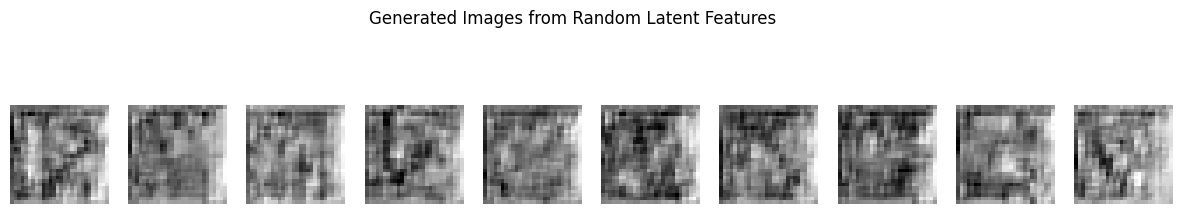

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Reshape, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import random as rnd
from sklearn.preprocessing import StandardScaler

# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a random subset of the dataset
t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
    idx = rnd.randint(0, sz - 1)
    for c in range(10):
        while train_labels[idx] != c:
            idx = rnd.randint(0, sz - 1)
        t_x.append(train_images[idx])
        t_y.append(train_labels[idx])

t_x = np.array(t_x, dtype=np.float32) / 255.0

# Add channel dimension to the images for convolutional layers
t_x = np.expand_dims(t_x, axis=-1)

# Define the convolutional autoencoder architecture
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(2, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Reshape to (28, 28) for visualization
decoded_reshaped = Reshape((28, 28))(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded_reshaped)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(t_x, t_x, epochs=50, batch_size=4, shuffle=True)

# Extract the decoder part from the autoencoder
decoder_input = Input(shape=(7, 7, 2))  # Adjust the shape based on the output shape of the encoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(decoder_input)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Reshape to (28, 28) for visualization
decoded_reshaped = Reshape((28, 28))(decoded)

# Create the decoder model
decoder = Model(decoder_input, decoded_reshaped)

# Generate new images based on randomly generated latent features
num_generated_images = 10
random_latent_features = np.random.rand(num_generated_images, 7, 7, 2)  # Adjust the shape based on the output shape of the encoder
generated_images = decoder.predict(random_latent_features)

# Reshape the generated images
generated_images_reshaped = generated_images.reshape((num_generated_images, 28, 28))

# Plot the generated images
plt.figure(figsize=(15, 3))
for i in range(num_generated_images):
    plt.subplot(1, num_generated_images, i + 1)
    plt.imshow(generated_images_reshaped[i], cmap='gray')
    plt.axis('off')

plt.suptitle('Generated Images from Random Latent Features')
plt.show()
